# 프로젝트 근무 일수 시각화하기

### 1. 라이브러리 설치 및 불러오기

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl  # 기본 설정
import matplotlib.font_manager as fm  # 폰트 관리

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 2. 데이터 프레임 제작

In [38]:
# 근무일수 환산 함수 제작
def day_cal(start, end):
    s_y = int(start[:4])
    s_m = int(start[4:6])
    s_d = int(start[6:])
    e_y = int(end[:4])
    e_m = int(end[4:6])
    e_d = int(end[6:])
    tmp_s = dt.datetime(s_y, s_m, s_d)
    tmp_e = dt.datetime(e_y, e_m, e_d)
    res = tmp_e - tmp_s
    return res.days

In [39]:
# 근무 및 학습기간 추가
exp = {
    "(학습)SeSAC" :["20231004", "20240229"],
    "코드스테이츠":["20220711", "20230831"],
    "(학습)AIB" : ["20211118","20220617"],
    "카카오뱅크":["20190701","20210630"],
    "메트라이프":["20180801","20190629"],
    "리파인" : ["20150709","20180718"],
    }

In [40]:
# 근무일수 계산

exp_day_li = []
for k, v in exp.items():
    tmp = day_cal(v[0], v[1])
    exp_day_li.append(tmp)
print(exp_day_li)

[148, 416, 211, 730, 332, 1105]


In [41]:
# 근무 데이터 프레임 제작

data = exp_day_li
data = data[::-1]
label = ["(학습)SeSAC", "코드스테이츠", "(학습)AIB" ,"카카오뱅크", "메트라이프", "리파인"]
label = label[::-1]

# 전체 합을 계산
total = sum(data)

# 비율 계산
ratios = [x / total for x in data]

# df 만들기
exp_df = pd.DataFrame({
    '직장명' : label,
    '근무일수' : data,
    '근무비율' : ratios
})
exp_df

,직장명,근무일수,근무비율
0,리파인,1105,0.375595
1,메트라이프,332,0.112848
2,카카오뱅크,730,0.248131
3,(학습)AIB,211,0.071720
4,코드스테이츠,416,0.141400
5,(학습)SeSAC,148,0.050306


In [42]:
# Add 시작일 and 종료일
exp_df['시작일'] = [exp[job][0] for job in exp_df['직장명']]
exp_df['종료일'] = [exp[job][1] for job in exp_df['직장명']]

In [43]:
exp_df

,직장명,근무일수,근무비율,시작일,종료일
0,리파인,1105,0.375595,20150709,20180718
1,메트라이프,332,0.112848,20180801,20190629
2,카카오뱅크,730,0.248131,20190701,20210630
3,(학습)AIB,211,0.071720,20211118,20220617
4,코드스테이츠,416,0.141400,20220711,20230831
5,(학습)SeSAC,148,0.050306,20231004,20240229


### 3. 시각화 진행

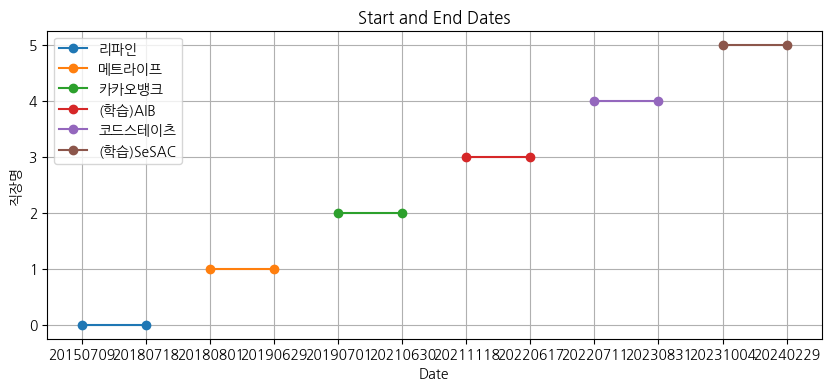

In [44]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Plot the start and end dates
for idx, row in exp_df.iterrows():
    plt.plot([row['시작일'], row['종료일']], [idx, idx], marker='o', label=row['직장명'])

# Customize the plot
plt.xlabel('Date')
plt.ylabel('직장명')
plt.title('Start and End Dates')
plt.legend()
plt.grid(True)
plt.show()

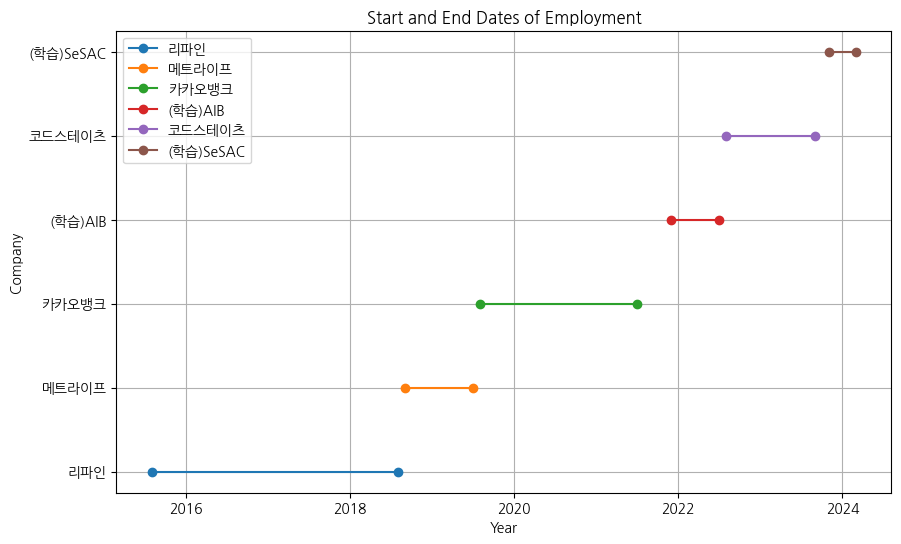

In [45]:
# 시작일과 종료일 컬럼을 datetime 형식으로 변환
exp_df['시작일'] = pd.to_datetime(exp_df['시작일'])
exp_df['종료일'] = pd.to_datetime(exp_df['종료일'])

# 시작일과 종료일의 연도와 월 추출
exp_df['시작연도'] = exp_df['시작일'].dt.year
exp_df['시작월'] = exp_df['시작일'].dt.month
exp_df['종료연도'] = exp_df['종료일'].dt.year
exp_df['종료월'] = exp_df['종료일'].dt.month

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 시작일과 종료일로 수평 막대그래프 그리기
for i in range(len(exp_df)):
    plt.plot([exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
              exp_df['종료연도'][i] + exp_df['종료월'][i]/12],
               [i, i], marker='o',
             label=exp_df['직장명'][i])

# 축 설정
plt.xlabel('Year')
plt.ylabel('Company')
plt.title('Start and End Dates of Employment')
plt.yticks(range(len(exp_df)), exp_df['직장명'])
plt.grid(True)
plt.legend()
plt.show()

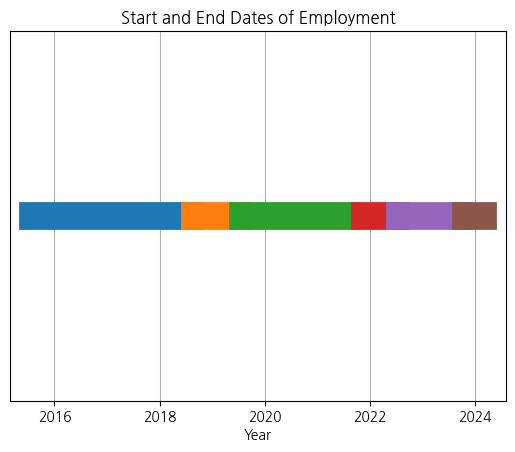

In [49]:
# 시작일과 종료일로 수평 막대그래프 그리기
for i in range(len(exp_df)):
    plt.plot([
        exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
        exp_df['종료연도'][i] + exp_df['종료월'][i]/12
        ],
        [0, 0],
        marker='o',
        label=exp_df['직장명'][i],
        linewidth=20
        )

# 축 설정
plt.xlabel('Year')
plt.title('Start and End Dates of Employment')
plt.grid(True)
# plt.legend()
plt.yticks([])
plt.show()

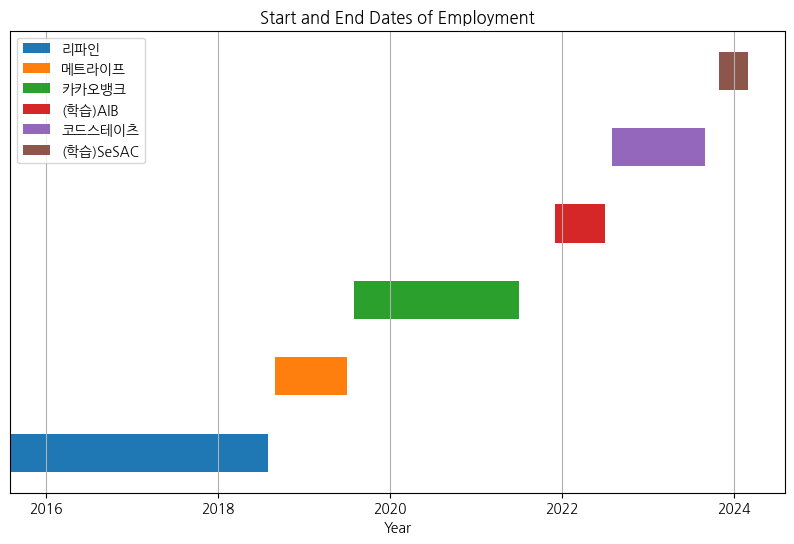

In [47]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

# 막대 수평 그래프 그리기
for i in range(len(exp_df)):
    plt.barh(exp_df['직장명'][i],
             exp_df['종료연도'][i] + exp_df['종료월'][i]/12 - exp_df['시작연도'][i] - exp_df['시작월'][i]/12,
             left=exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
             height=0.5, label=exp_df['직장명'][i]
             )

# 축 설정
plt.xlabel('Year')
plt.title('Start and End Dates of Employment')
plt.grid(True)
plt.legend()
plt.yticks([])
plt.show()

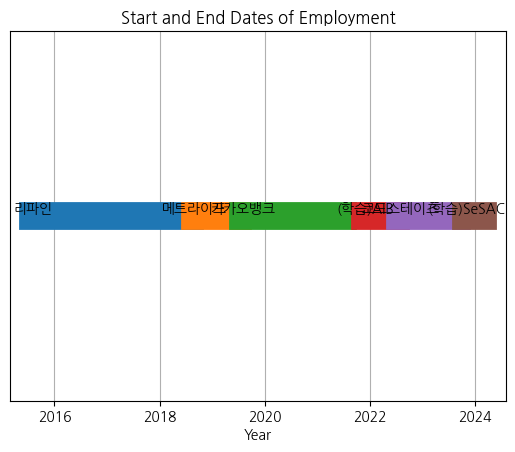

In [52]:
# 시작일과 종료일로 수평 막대그래프 그리기
for i in range(len(exp_df)):
    plt.plot([
        exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
        exp_df['종료연도'][i] + exp_df['종료월'][i]/12],
        [0, 0],
        marker='o',
        label=exp_df['직장명'][i],
        linewidth=20
        )
    # 직장명 텍스트 추가
    plt.text(exp_df['시작연도'][i] + exp_df['시작월'][i]/12, 0, exp_df['직장명'][i], ha='center', va='bottom')
# 축 설정
plt.xlabel('Year')
plt.title('Start and End Dates of Employment')
plt.grid(True)
# plt.legend()
plt.yticks([])
plt.show()

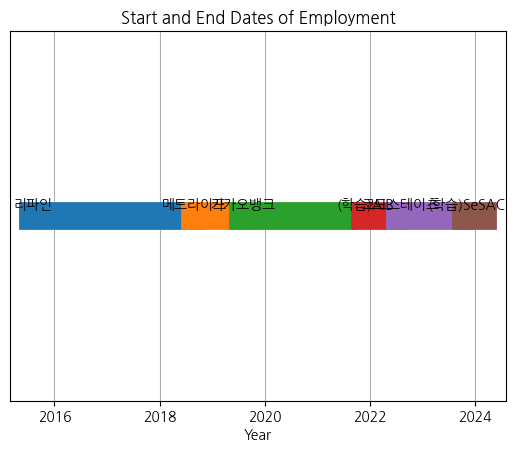

In [53]:
for i in range(len(exp_df)):
    plt.plot([exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
              exp_df['종료연도'][i] + exp_df['종료월'][i]/12],
               [0, 0],
             marker='o',
             linewidth=20
             )
    # 직장명 주석으로 추가
    plt.annotate(exp_df['직장명'][i],
                 xy=(exp_df['시작연도'][i] + exp_df['시작월'][i]/12, 0),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center'
                 )

# 축 설정
plt.xlabel('Year')
plt.title('Start and End Dates of Employment')
plt.grid(True)
plt.yticks([])
plt.show()

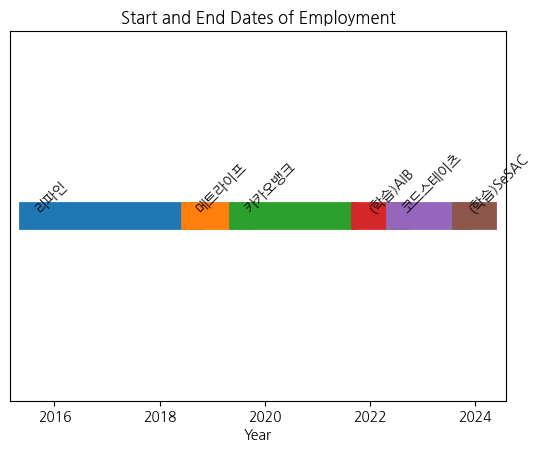

In [68]:
# 시작일과 종료일로 수평 막대그래프 그리기
for i in range(len(exp_df)):
    plt.plot([
        exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
        exp_df['종료연도'][i] + exp_df['종료월'][i]/12
        ],
        [0, 0],
        marker='o',
        label=exp_df['직장명'][i],
        linewidth=20
        )
    # 직장명 텍스트 추가
    plt.text(exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
             0,
             exp_df['직장명'][i],
             ha='left',
             va='bottom',rotation=45)
# 축 설정
plt.xlabel('Year')
plt.title('Start and End Dates of Employment')
plt.yticks([])
plt.show()

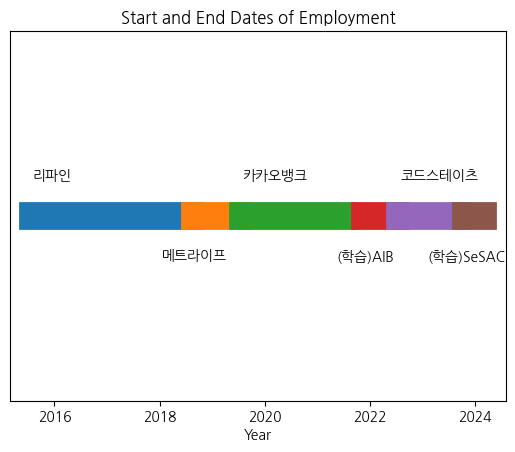

In [81]:
# 시작일과 종료일로 수평 막대그래프 그리기
for i in range(len(exp_df)):
    plt.plot([
        exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
        exp_df['종료연도'][i] + exp_df['종료월'][i]/12
        ],
        [0, 0],
        marker='o',
        label=exp_df['직장명'][i],
        linewidth=20
        )
    # 직장명 텍스트 추가
    if i % 2 == 0:
        plt.text(exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
                 0.01,
                 exp_df['직장명'][i],
                 ha='left',
                 va='bottom',
                 rotation=0)
    else:
        plt.text(exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
                 -0.01,
                 exp_df['직장명'][i],
                 ha='center',
                 va='top',
                 rotation=0)

# 축 설정
plt.xlabel('Year')
plt.title('Start and End Dates of Employment')
plt.yticks([])
plt.show()

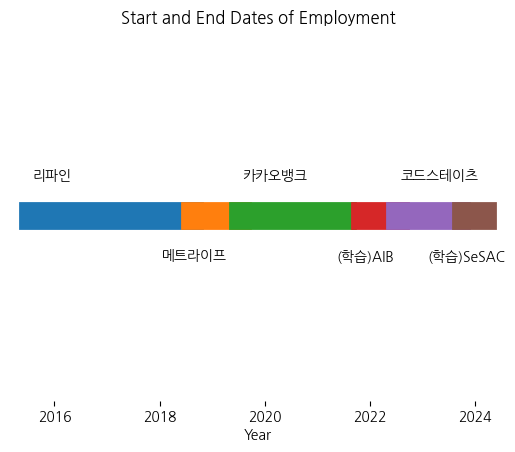

In [85]:
# 시작일과 종료일로 수평 막대그래프 그리기
fig, ax = plt.subplots()
for i in range(len(exp_df)):
    ax.plot([
        exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
        exp_df['종료연도'][i] + exp_df['종료월'][i]/12
        ],
        [0, 0],
        marker='o',
        label=exp_df['직장명'][i],
        linewidth=20
        )
    # 직장명 텍스트 추가
    if i % 2 == 0:
        ax.text(exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
                0.01,
                exp_df['직장명'][i],
                ha='left',
                va='bottom',
                rotation=0)
    else:
        ax.text(exp_df['시작연도'][i] + exp_df['시작월'][i]/12,
                -0.01,
                exp_df['직장명'][i],
                ha='center',
                va='top',
                rotation=0)

# 축 설정
ax.set_xlabel('Year')
ax.set_title('Start and End Dates of Employment')
ax.set_yticks([])

# 테두리 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

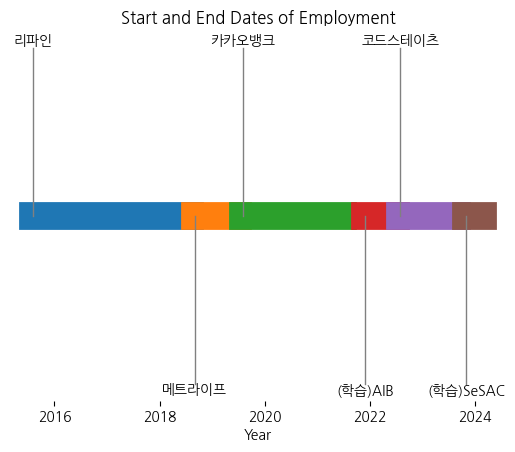

In [121]:
# 시작일과 종료일로 수평 막대그래프 그리기
fig, ax = plt.subplots()
for i in range(len(exp_df)):
    start_x = exp_df['시작연도'][i] + exp_df['시작월'][i]/12
    end_x = exp_df['종료연도'][i] + exp_df['종료월'][i]/12
    ax.plot([start_x, end_x], [0, 0], marker='o', linewidth=20)

    # 직장명 텍스트 추가
    if i % 2 == 0:
        ax.plot([start_x, start_x], [0, 0.1], color='gray', linestyle='-', linewidth=1) # 선 추가
        ax.text(start_x,
                0.1,
                exp_df['직장명'][i],
                ha='center',
                va='bottom',
                rotation=0)
    else:
        ax.plot([start_x, start_x], [0, -0.1], color='gray', linestyle='-', linewidth=1) # 선 추가
        ax.text(start_x,
                -0.1,
                exp_df['직장명'][i],
                ha='center',
                va='top',
                rotation=0)

# 축 설정
ax.set_xlabel('Year')
ax.set_title('Start and End Dates of Employment')
ax.set_yticks([])

# 테두리 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

시각화 진행을 해보았습니다. 마지막에 plt와 text사이 선을 그어주는 부분은 y축이 지정되지 않아서 라인이 길게 보여진것 같습니다.
보기에는 바로 위에 버전이 좋으므로 바로 위 내용을 사용할 예정입니다.